# IMPORT DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score  # For model evaluation (example: accuracy)
from sklearn.linear_model import LogisticRegression  # For logistic regression modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score,roc_auc_score


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier

# from sklearn.ensemble import RandomForestClassifier  # For random forest modeling

# EDA

In [3]:
df=pd.read_csv('loan.csv')

In [4]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [6]:
df.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1068575,1303001,15300.0,15300.0,15275.0,60 months,22.06,423.10,F,F4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1049528,1280928,20000.0,12800.0,12775.0,60 months,11.71,282.86,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1068542,1303143,17500.0,17500.0,17500.0,60 months,17.27,437.47,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1068350,1302971,3500.0,3500.0,3500.0,36 months,6.03,106.53,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
samples=df.sample(n=10000)

In [8]:
samples

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
130141,5639355,7021793,12000.0,12000.0,12000.0,36 months,6.03,365.23,A,A1,...,NaN,NaN,NaN,NaN,NaN,NaN,97000.0,NaN,NaN,NaN
565235,62619662,66882387,35000.0,35000.0,35000.0,60 months,13.99,814.21,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,13200.0,NaN,NaN,NaN
276314,31437495,34030686,31600.0,31600.0,31600.0,36 months,7.12,977.46,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,31900.0,NaN,NaN,NaN
48084,9815976,1255103,12000.0,12000.0,12000.0,36 months,10.99,392.81,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,17800.0,NaN,NaN,NaN
123693,5773861,7205635,19425.0,19425.0,19425.0,60 months,20.49,519.96,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,11100.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277147,31237352,33810586,24000.0,24000.0,24000.0,60 months,20.20,638.53,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,12800.0,NaN,NaN,NaN
767520,46815942,49963787,21000.0,21000.0,21000.0,60 months,16.99,521.80,D,D3,...,NaN,NaN,NaN,NaN,NaN,NaN,56500.0,NaN,NaN,NaN
380471,17502985,19625530,35000.0,35000.0,35000.0,36 months,18.99,1282.79,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,78400.0,NaN,NaN,NaN
243774,35833493,38528930,18000.0,18000.0,18000.0,60 months,9.49,377.95,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,9300.0,NaN,NaN,NaN


In [9]:
# samples.to_csv('samples.csv', index=False)

In [10]:
selected_col=["id", "loan_amnt", "term", "int_rate", "installment", "grade", "emp_length", "home_ownership", "annual_inc", "verification_status", "pymnt_plan","purpose","dti","delinq_2yrs","inq_last_6mths","pub_rec","application_type","loan_status"]

In [11]:
selected_col=df[selected_col]

In [12]:
selected_col.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,n,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
1,1077430,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,n,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Charged Off
2,1077175,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,n,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Fully Paid
3,1076863,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,n,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
4,1075358,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,n,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Current


In [13]:
selected_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   887379 non-null  int64  
 1   loan_amnt            887379 non-null  float64
 2   term                 887379 non-null  object 
 3   int_rate             887379 non-null  float64
 4   installment          887379 non-null  float64
 5   grade                887379 non-null  object 
 6   emp_length           842554 non-null  object 
 7   home_ownership       887379 non-null  object 
 8   annual_inc           887375 non-null  float64
 9   verification_status  887379 non-null  object 
 10  pymnt_plan           887379 non-null  object 
 11  purpose              887379 non-null  object 
 12  dti                  887379 non-null  float64
 13  delinq_2yrs          887350 non-null  float64
 14  inq_last_6mths       887350 non-null  float64
 15  pub_rec          

In [14]:
selected_col.isna().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
pymnt_plan                 0
purpose                    0
dti                        0
delinq_2yrs               29
inq_last_6mths            29
pub_rec                   29
application_type           0
loan_status                0
dtype: int64

In [15]:
selected_col.dropna(inplace=True)

In [16]:
selected_col.isna().sum()

id                     0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
pymnt_plan             0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
pub_rec                0
application_type       0
loan_status            0
dtype: int64

In [17]:
selected_col.shape

(842525, 18)

In [18]:
selected_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842525 entries, 0 to 887378
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   842525 non-null  int64  
 1   loan_amnt            842525 non-null  float64
 2   term                 842525 non-null  object 
 3   int_rate             842525 non-null  float64
 4   installment          842525 non-null  float64
 5   grade                842525 non-null  object 
 6   emp_length           842525 non-null  object 
 7   home_ownership       842525 non-null  object 
 8   annual_inc           842525 non-null  float64
 9   verification_status  842525 non-null  object 
 10  pymnt_plan           842525 non-null  object 
 11  purpose              842525 non-null  object 
 12  dti                  842525 non-null  float64
 13  delinq_2yrs          842525 non-null  float64
 14  inq_last_6mths       842525 non-null  float64
 15  pub_rec          

In [19]:
# selected_col.to_csv('selected_col.csv', index=False)

In [20]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,n,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
1,1077430,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,n,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Charged Off
2,1077175,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,n,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Fully Paid
3,1076863,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,n,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
4,1075358,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,n,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,36 months,11.99,332.10,B,8 years,RENT,31000.0,Verified,n,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,Current
887375,36441262,24000.0,36 months,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,n,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,Current
887376,36271333,13000.0,60 months,15.99,316.07,D,5 years,RENT,35000.0,Verified,n,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,Current
887377,36490806,12000.0,60 months,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,n,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,Current


In [21]:
selected_col['term']=selected_col['term'].replace({" 36 months":0, " 60 months":1})

In [22]:
selected_col.term.unique()

array([0, 1], dtype=int64)

In [23]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,0,10.65,162.87,B,10+ years,RENT,24000.0,Verified,n,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
1,1077430,2500.0,1,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,n,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Charged Off
2,1077175,2400.0,0,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,n,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Fully Paid
3,1076863,10000.0,0,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,n,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
4,1075358,3000.0,1,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,n,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,0,11.99,332.10,B,8 years,RENT,31000.0,Verified,n,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,Current
887375,36441262,24000.0,0,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,n,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,Current
887376,36271333,13000.0,1,15.99,316.07,D,5 years,RENT,35000.0,Verified,n,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,Current
887377,36490806,12000.0,1,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,n,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,Current


In [24]:
selected_col['grade']=selected_col['grade'].replace({"A":6, "B":5,"C":4, "D":3, "E":2, "F":1, 'G':0})

In [25]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,0,10.65,162.87,5,10+ years,RENT,24000.0,Verified,n,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
1,1077430,2500.0,1,15.27,59.83,4,< 1 year,RENT,30000.0,Source Verified,n,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Charged Off
2,1077175,2400.0,0,15.96,84.33,4,10+ years,RENT,12252.0,Not Verified,n,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Fully Paid
3,1076863,10000.0,0,13.49,339.31,4,10+ years,RENT,49200.0,Source Verified,n,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
4,1075358,3000.0,1,12.69,67.79,5,1 year,RENT,80000.0,Source Verified,n,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,0,11.99,332.10,5,8 years,RENT,31000.0,Verified,n,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,Current
887375,36441262,24000.0,0,11.99,797.03,5,10+ years,MORTGAGE,79000.0,Verified,n,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,Current
887376,36271333,13000.0,1,15.99,316.07,3,5 years,RENT,35000.0,Verified,n,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,Current
887377,36490806,12000.0,1,19.99,317.86,2,1 year,RENT,64400.0,Source Verified,n,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,Current


In [26]:
selected_col['emp_length'] = selected_col['emp_length'].str.extract('(\d+)')


In [27]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,0,10.65,162.87,5,10,RENT,24000.0,Verified,n,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
1,1077430,2500.0,1,15.27,59.83,4,1,RENT,30000.0,Source Verified,n,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Charged Off
2,1077175,2400.0,0,15.96,84.33,4,10,RENT,12252.0,Not Verified,n,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Fully Paid
3,1076863,10000.0,0,13.49,339.31,4,10,RENT,49200.0,Source Verified,n,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
4,1075358,3000.0,1,12.69,67.79,5,1,RENT,80000.0,Source Verified,n,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,0,11.99,332.10,5,8,RENT,31000.0,Verified,n,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,Current
887375,36441262,24000.0,0,11.99,797.03,5,10,MORTGAGE,79000.0,Verified,n,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,Current
887376,36271333,13000.0,1,15.99,316.07,3,5,RENT,35000.0,Verified,n,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,Current
887377,36490806,12000.0,1,19.99,317.86,2,1,RENT,64400.0,Source Verified,n,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,Current


In [28]:
selected_col.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [29]:
selected_col['verification_status']=selected_col['verification_status'].replace({'Source Verified':1,'Verified':1,'Not Verified':0})

In [30]:
selected_col.verification_status.unique()

array([1, 0], dtype=int64)

In [31]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,0,10.65,162.87,5,10,RENT,24000.0,1,n,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
1,1077430,2500.0,1,15.27,59.83,4,1,RENT,30000.0,1,n,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Charged Off
2,1077175,2400.0,0,15.96,84.33,4,10,RENT,12252.0,0,n,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Fully Paid
3,1076863,10000.0,0,13.49,339.31,4,10,RENT,49200.0,1,n,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
4,1075358,3000.0,1,12.69,67.79,5,1,RENT,80000.0,1,n,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,0,11.99,332.10,5,8,RENT,31000.0,1,n,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,Current
887375,36441262,24000.0,0,11.99,797.03,5,10,MORTGAGE,79000.0,1,n,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,Current
887376,36271333,13000.0,1,15.99,316.07,3,5,RENT,35000.0,1,n,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,Current
887377,36490806,12000.0,1,19.99,317.86,2,1,RENT,64400.0,1,n,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,Current


In [32]:
selected_col.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [33]:
selected_col['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [34]:
loan_status_notneeded=selected_col[(selected_col['loan_status']=='Issued') | (selected_col['loan_status']=='In Grace Period') ]

In [35]:
selected_col.drop(loan_status_notneeded.index, inplace=True)

In [36]:
selected_col['pymnt_plan']=selected_col['pymnt_plan'].replace({"n":0, "y":1})

In [37]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,0,10.65,162.87,5,10,RENT,24000.0,1,0,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
1,1077430,2500.0,1,15.27,59.83,4,1,RENT,30000.0,1,0,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Charged Off
2,1077175,2400.0,0,15.96,84.33,4,10,RENT,12252.0,0,0,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Fully Paid
3,1076863,10000.0,0,13.49,339.31,4,10,RENT,49200.0,1,0,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Fully Paid
4,1075358,3000.0,1,12.69,67.79,5,1,RENT,80000.0,1,0,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,0,11.99,332.10,5,8,RENT,31000.0,1,0,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,Current
887375,36441262,24000.0,0,11.99,797.03,5,10,MORTGAGE,79000.0,1,0,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,Current
887376,36271333,13000.0,1,15.99,316.07,3,5,RENT,35000.0,1,0,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,Current
887377,36490806,12000.0,1,19.99,317.86,2,1,RENT,64400.0,1,0,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,Current


In [38]:
selected_col['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [39]:
selected_col['loan_status'] = np.where(selected_col['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']), 'Default', 'Non-Default')


In [40]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,0,10.65,162.87,5,10,RENT,24000.0,1,0,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,Non-Default
1,1077430,2500.0,1,15.27,59.83,4,1,RENT,30000.0,1,0,car,1.00,0.0,5.0,0.0,INDIVIDUAL,Default
2,1077175,2400.0,0,15.96,84.33,4,10,RENT,12252.0,0,0,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,Non-Default
3,1076863,10000.0,0,13.49,339.31,4,10,RENT,49200.0,1,0,other,20.00,0.0,1.0,0.0,INDIVIDUAL,Non-Default
4,1075358,3000.0,1,12.69,67.79,5,1,RENT,80000.0,1,0,other,17.94,0.0,0.0,0.0,INDIVIDUAL,Non-Default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,0,11.99,332.10,5,8,RENT,31000.0,1,0,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,Non-Default
887375,36441262,24000.0,0,11.99,797.03,5,10,MORTGAGE,79000.0,1,0,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,Non-Default
887376,36271333,13000.0,1,15.99,316.07,3,5,RENT,35000.0,1,0,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,Non-Default
887377,36490806,12000.0,1,19.99,317.86,2,1,RENT,64400.0,1,0,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,Non-Default


In [41]:
selected_col['loan_status']=selected_col['loan_status'].replace({"Default":0, "Non-Default":1})

In [42]:
selected_col

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
0,1077501,5000.0,0,10.65,162.87,5,10,RENT,24000.0,1,0,credit_card,27.65,0.0,1.0,0.0,INDIVIDUAL,1
1,1077430,2500.0,1,15.27,59.83,4,1,RENT,30000.0,1,0,car,1.00,0.0,5.0,0.0,INDIVIDUAL,0
2,1077175,2400.0,0,15.96,84.33,4,10,RENT,12252.0,0,0,small_business,8.72,0.0,2.0,0.0,INDIVIDUAL,1
3,1076863,10000.0,0,13.49,339.31,4,10,RENT,49200.0,1,0,other,20.00,0.0,1.0,0.0,INDIVIDUAL,1
4,1075358,3000.0,1,12.69,67.79,5,1,RENT,80000.0,1,0,other,17.94,0.0,0.0,0.0,INDIVIDUAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,10000.0,0,11.99,332.10,5,8,RENT,31000.0,1,0,debt_consolidation,28.69,0.0,0.0,1.0,INDIVIDUAL,1
887375,36441262,24000.0,0,11.99,797.03,5,10,MORTGAGE,79000.0,1,0,home_improvement,3.90,0.0,1.0,0.0,INDIVIDUAL,1
887376,36271333,13000.0,1,15.99,316.07,3,5,RENT,35000.0,1,0,debt_consolidation,30.90,0.0,0.0,1.0,INDIVIDUAL,1
887377,36490806,12000.0,1,19.99,317.86,2,1,RENT,64400.0,1,0,debt_consolidation,27.19,1.0,2.0,0.0,INDIVIDUAL,1


In [43]:
selected_col=selected_col.drop('id', axis=1)

In [44]:
selected_col['loan_status'].value_counts(normalize=True)

1    0.93037
0    0.06963
Name: loan_status, dtype: float64

<AxesSubplot:>

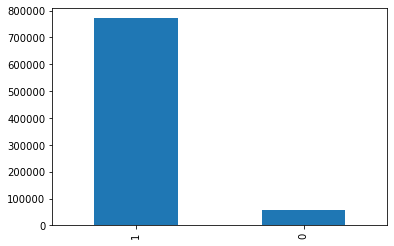

In [45]:
selected_col['loan_status'].value_counts().plot(kind='bar')

In [46]:
non_default_count = (selected_col['loan_status'] == 1).sum()


In [47]:
default_count = (selected_col['loan_status'] == 0).sum()
default_count

57701

In [48]:
non_default_count

770980

In [49]:
selected_col['loan_status']==1

0          True
1         False
2          True
3          True
4          True
          ...  
887374     True
887375     True
887376     True
887377     True
887378     True
Name: loan_status, Length: 828681, dtype: bool

In [50]:
index_toremove=selected_col[selected_col['loan_status'] == 1].sample(n=700000)

In [51]:
index_toremove=index_toremove.index

<AxesSubplot:>

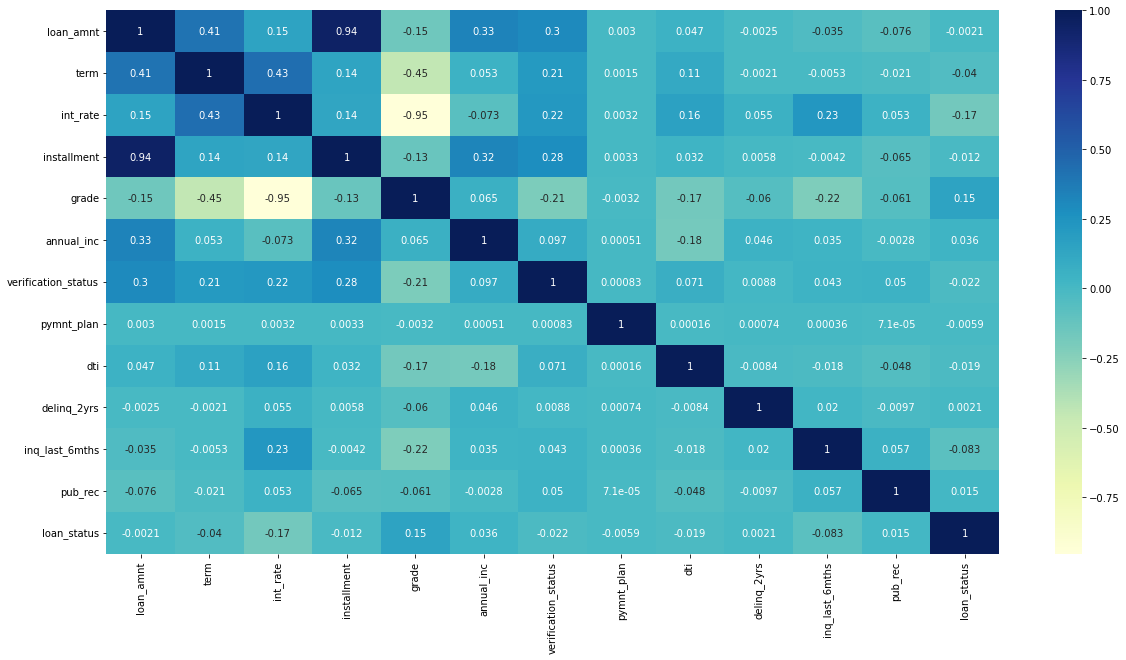

In [52]:
# check correlation of features with the response column
plt.figure(figsize=(20,10))
sns.heatmap(selected_col.corr(), annot=True, cmap='YlGnBu')

In [53]:
bal_data=selected_col.drop(index_toremove)

In [54]:
bal_data['loan_status'].value_counts(normalize=True)

1    0.551597
0    0.448403
Name: loan_status, dtype: float64

In [55]:
bal_data

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,pub_rec,application_type,loan_status
1,2500.0,1,15.27,59.83,4,1,RENT,30000.0,1,0,car,1.00,0.0,5.0,0.0,INDIVIDUAL,0
4,3000.0,1,12.69,67.79,5,1,RENT,80000.0,1,0,other,17.94,0.0,0.0,0.0,INDIVIDUAL,1
8,5600.0,1,21.28,152.39,1,4,OWN,40000.0,1,0,small_business,5.55,0.0,2.0,0.0,INDIVIDUAL,0
9,5375.0,1,12.69,121.45,5,1,RENT,15000.0,1,0,other,18.08,0.0,0.0,0.0,INDIVIDUAL,0
12,9000.0,0,13.49,305.38,4,1,RENT,30000.0,1,0,debt_consolidation,10.08,0.0,1.0,0.0,INDIVIDUAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887330,14000.0,0,15.99,492.13,3,5,MORTGAGE,69000.0,1,0,home_improvement,8.23,0.0,0.0,0.0,INDIVIDUAL,0
887345,28000.0,0,15.59,978.74,3,3,RENT,120000.0,1,0,debt_consolidation,26.60,0.0,0.0,0.0,INDIVIDUAL,0
887351,4200.0,0,15.99,147.64,3,10,MORTGAGE,48000.0,1,0,medical,36.93,0.0,0.0,0.0,INDIVIDUAL,0
887373,11575.0,0,15.59,404.61,3,10,RENT,25400.0,1,0,credit_card,27.08,0.0,0.0,0.0,INDIVIDUAL,1


In [56]:
bal_data.describe()

,loan_amnt,term,int_rate,installment,grade,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,pub_rec,loan_status
count,128681.000000,128681.000000,128681.000000,128681.000000,128681.000000,1.286810e+05,128681.000000,128681.000000,128681.000000,128681.000000,128681.000000,128681.000000,128681.000000
mean,14924.861673,0.333655,14.374848,444.659775,3.915815,7.296091e+04,0.704191,0.000047,18.299870,0.312836,0.816344,0.172908,0.551597
std,8444.982573,0.471520,4.556569,246.186367,1.383186,6.643555e+04,0.456407,0.006828,8.188427,0.855619,1.113551,0.519804,0.497333
min,500.000000,0.000000,5.320000,15.910000,0.000000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8400.000000,0.000000,11.140000,267.770000,3.000000,4.500000e+04,0.000000,0.000000,12.200000,0.000000,0.000000,0.000000,0.000000
50%,13275.000000,0.000000,14.090000,391.840000,4.000000,6.200000e+04,1.000000,0.000000,17.980000,0.000000,0.000000,0.000000,1.000000
75%,20000.000000,1.000000,17.570000,580.090000,5.000000,8.700000e+04,1.000000,0.000000,24.070000,0.000000,1.000000,0.000000,1.000000
max,35000.000000,1.000000,28.990000,1424.570000,6.000000,8.706582e+06,1.000000,1.000000,69.350000,21.000000,33.000000,28.000000,1.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'loan_amnt'),
  Text(1, 0, 'term'),
  Text(2, 0, 'int_rate'),
  Text(3, 0, 'installment'),
  Text(4, 0, 'grade'),
  Text(5, 0, 'annual_inc'),
  Text(6, 0, 'verification_status'),
  Text(7, 0, 'pymnt_plan'),
  Text(8, 0, 'dti'),
  Text(9, 0, 'delinq_2yrs'),
  Text(10, 0, 'inq_last_6mths'),
  Text(11, 0, 'pub_rec'),
  Text(12, 0, 'loan_status')])

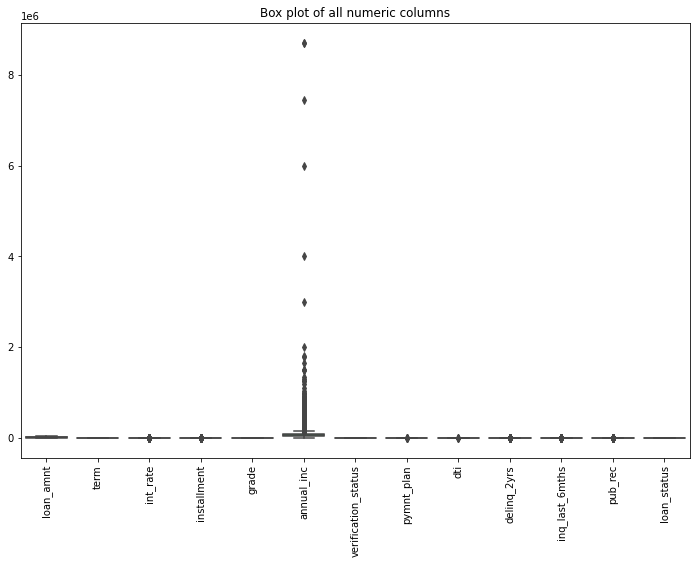

In [57]:
numeric_columns = bal_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=bal_data[numeric_columns], orient="v")
plt.title("Box plot of all numeric columns")
plt.xticks(rotation=90)


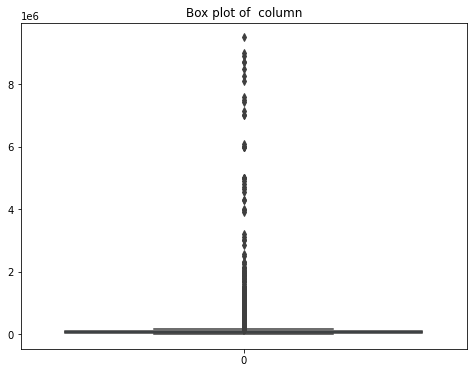

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['annual_inc'])
plt.title(f"Box plot of  column")
plt.show()

In [59]:
summary_stats = bal_data["annual_inc"].describe()

# Determine Q1 and Q3 for IQR calculation
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1

In [60]:
IQR

42000.0

# FEATURE ENGINEERING

In [61]:
pd.set_option('display.max_columns', None) 

In [62]:
encoded_df = pd.get_dummies(bal_data, columns=['home_ownership', 'purpose', 'application_type'])


In [63]:
encoded_df

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,pub_rec,loan_status,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
1,2500.0,1,15.27,59.83,4,1,30000.0,1,0,1.00,0.0,5.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3000.0,1,12.69,67.79,5,1,80000.0,1,0,17.94,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,5600.0,1,21.28,152.39,1,4,40000.0,1,0,5.55,0.0,2.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,5375.0,1,12.69,121.45,5,1,15000.0,1,0,18.08,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
12,9000.0,0,13.49,305.38,4,1,30000.0,1,0,10.08,0.0,1.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887330,14000.0,0,15.99,492.13,3,5,69000.0,1,0,8.23,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
887345,28000.0,0,15.59,978.74,3,3,120000.0,1,0,26.60,0.0,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
887351,4200.0,0,15.99,147.64,3,10,48000.0,1,0,36.93,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
887373,11575.0,0,15.59,404.61,3,10,25400.0,1,0,27.08,0.0,0.0,0.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128681 entries, 1 to 887376
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    128681 non-null  float64
 1   term                         128681 non-null  int64  
 2   int_rate                     128681 non-null  float64
 3   installment                  128681 non-null  float64
 4   grade                        128681 non-null  int64  
 5   emp_length                   128681 non-null  object 
 6   annual_inc                   128681 non-null  float64
 7   verification_status          128681 non-null  int64  
 8   pymnt_plan                   128681 non-null  int64  
 9   dti                          128681 non-null  float64
 10  delinq_2yrs                  128681 non-null  float64
 11  inq_last_6mths               128681 non-null  float64
 12  pub_rec                      128681 non-null  float64
 13 

In [65]:
X=encoded_df.drop('loan_status', axis=1)
y=encoded_df['loan_status']

In [66]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [68]:
model=LogisticRegression()

In [69]:
xtrain

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,pub_rec,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
43634,-1.293656,-0.707618,-0.084460,-1.250926,0.060863,0.283003,-0.646658,0.648128,-0.006829,-0.827985,-0.365626,0.164929,-0.332643,1.045427,-0.008816,-0.020299,-0.315316,-0.870817,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
122961,2.377177,1.413192,0.464200,1.688241,-0.662108,1.135270,0.256477,0.648128,-0.006829,0.301662,-0.365626,-0.733103,-0.332643,-0.956547,-0.008816,-0.020299,3.171422,-0.870817,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
50361,-1.175242,-0.707618,0.135004,-1.102217,0.060863,1.135270,1.009089,0.648128,-0.006829,-0.676551,0.803123,-0.733103,-0.332643,1.045427,-0.008816,-0.020299,-0.315316,-0.870817,-0.097794,-0.509960,-1.235185,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,7.227722,-0.073584,-0.060352,0.017412,-0.017412
56240,-0.701586,-0.707618,0.271072,-0.527935,-0.662108,1.135270,-0.164986,-1.542906,-0.006829,-1.438605,0.803123,-0.733103,-0.332643,-0.956547,-0.008816,-0.020299,3.171422,-0.870817,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
99881,-0.820000,-0.707618,-0.369764,-0.716126,0.060863,-1.421531,-0.646658,0.648128,-0.006829,0.998991,-0.365626,0.164929,1.591168,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,1.960939,-1.235185,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91961,0.600967,-0.707618,-0.369764,0.918983,0.060863,-0.853353,0.136059,0.648128,-0.006829,-0.668003,-0.365626,1.062960,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
91078,-0.156882,-0.707618,2.720292,0.442310,-2.831022,1.135270,-0.496135,0.648128,-0.006829,0.696123,-0.365626,-0.733103,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
43914,0.482553,1.413192,2.184799,0.428865,-2.831022,1.135270,-0.270352,0.648128,-0.006829,-0.435967,1.971872,0.164929,-0.332643,1.045427,-0.008816,-0.020299,-0.315316,-0.870817,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
94683,-0.109517,-0.707618,-1.785308,-0.069946,1.506806,-1.421531,0.075850,-1.542906,-0.006829,-0.853631,-0.365626,-0.733103,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412


# MODELLING

In [70]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [71]:
LR_predictions=model.predict(xtest)

In [72]:
LR_accuracy_score=accuracy_score(ytest,LR_predictions)
LR_precision=precision_score(ytest,LR_predictions)
LR_recall=recall_score(ytest,LR_predictions)
LR_f1_score=f1_score(ytest,LR_predictions)



In [73]:
# # check multicolinearity on all selected features for modelling
# vif_scores = pd.DataFrame() 
# vif_scores["Attribute"] = X.columns 
  
# # calculating VIF for each feature 
# vif_scores["VIF Scores"] = [variance_inflation_factor(xtrain, i) for i in range(len(X.columns))] 
  
# display(vif_scores)

In [74]:
coefficients = model.coef_[0]
coefficients

array([ 2.19361756e-01,  9.96346850e-03, -1.53364808e+00, -2.23175322e-01,
       -8.79340459e-01,  4.07144297e-02,  2.26087085e-01,  2.32812564e-02,
       -9.13083021e-03,  3.45107853e-02,  2.41441390e-02, -1.95401761e-01,
        8.57310478e-02,  3.78219172e-02, -5.23074013e-03, -2.22494181e-02,
        1.62535036e-02, -4.65543985e-02, -7.41315027e-03,  5.28872277e-02,
       -2.07881406e-03, -4.85422612e-02, -6.50137596e-03, -1.60588855e-02,
        1.62379084e-03, -6.38567990e-03, -1.78670539e-03, -3.80876997e-04,
       -1.89715806e-02, -1.00225568e-01,  5.00813113e-03, -2.11513814e-02,
       -1.91488829e-02,  1.91488829e-02])

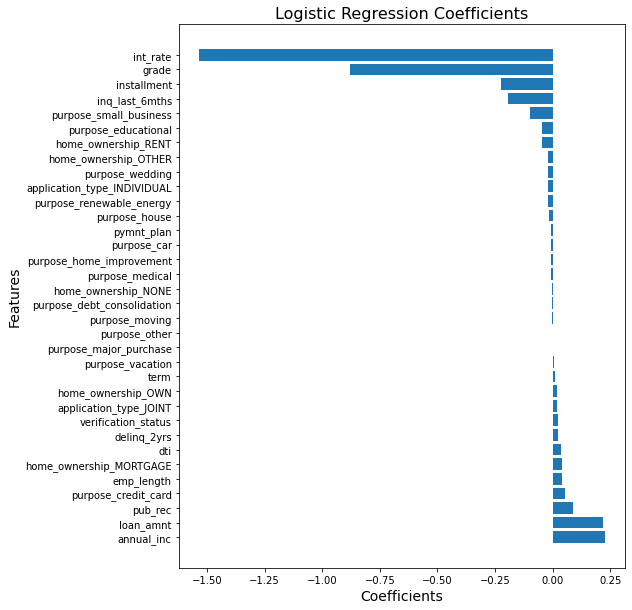

In [75]:
# Assuming you have feature names stored in a list called 'feature_names'
# and coefficients stored in a list called 'coefficients'
sorted_indices = np.argsort(coefficients)[::-1]  # Get the indices that would sort the coefficients in descending order

sorted_feature_names = [X.columns[i] for i in sorted_indices]
sorted_coefficients = [coefficients[i] for i in sorted_indices]

plt.figure(figsize=(8, 10))  # Adjust the figure size as needed for a better layout
plt.barh(sorted_feature_names, sorted_coefficients)  # Use barh with sorted data
plt.xlabel('Coefficients', fontsize=14)  # Set the fontsize for the xlabel
plt.ylabel('Features', fontsize=14)  # Set the fontsize for the ylabel
plt.title('Logistic Regression Coefficients', fontsize=16)  # Set the fontsize for the title
plt.show()


In [76]:
unrelated_variables=['purpose_other','purpose_home_improvement', 'purpose_house']

In [77]:
tree=DecisionTreeClassifier()

In [78]:
tree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [79]:
Tree_predictions=tree.predict(xtest)

In [80]:
Tree_accuracy_score=accuracy_score(ytest,Tree_predictions)
Tree_precision=precision_score(ytest,Tree_predictions)
Tree_recall=recall_score(ytest,Tree_predictions)
Tree_f1_score=f1_score(ytest,Tree_predictions)

In [81]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

Tree2 = tree.fit(xtrain,ytrain)
y_predT = Tree2.predict(xtest)

In [82]:
print('Classification report:\n', classification_report(ytest, y_predT))

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62     11560
           1       0.69      0.62      0.66     14177

    accuracy                           0.64     25737
   macro avg       0.64      0.64      0.64     25737
weighted avg       0.65      0.64      0.64     25737



[Text(0.5, 0.875, 'int_rate <= -0.366\nentropy = 0.992\nsamples = 102944\nvalue = [46141, 56803]\nclass = Non-Default'),
 Text(0.25, 0.625, 'int_rate <= -1.315\nentropy = 0.832\nsamples = 38872\nvalue = [10237, 28635]\nclass = Non-Default'),
 Text(0.125, 0.375, 'annual_inc <= -0.442\nentropy = 0.601\nsamples = 11844\nvalue = [1735, 10109]\nclass = Non-Default'),
 Text(0.0625, 0.125, 'entropy = 0.826\nsamples = 1690\nvalue = [439, 1251]\nclass = Non-Default'),
 Text(0.1875, 0.125, 'entropy = 0.551\nsamples = 10154\nvalue = [1296, 8858]\nclass = Non-Default'),
 Text(0.375, 0.375, 'grade <= 0.422\nentropy = 0.898\nsamples = 27028\nvalue = [8502, 18526]\nclass = Non-Default'),
 Text(0.3125, 0.125, 'entropy = 0.745\nsamples = 4427\nvalue = [938, 3489]\nclass = Non-Default'),
 Text(0.4375, 0.125, 'entropy = 0.92\nsamples = 22601\nvalue = [7564, 15037]\nclass = Non-Default'),
 Text(0.75, 0.625, 'int_rate <= 0.923\nentropy = 0.989\nsamples = 64072\nvalue = [35904, 28168]\nclass = Default'),
 T

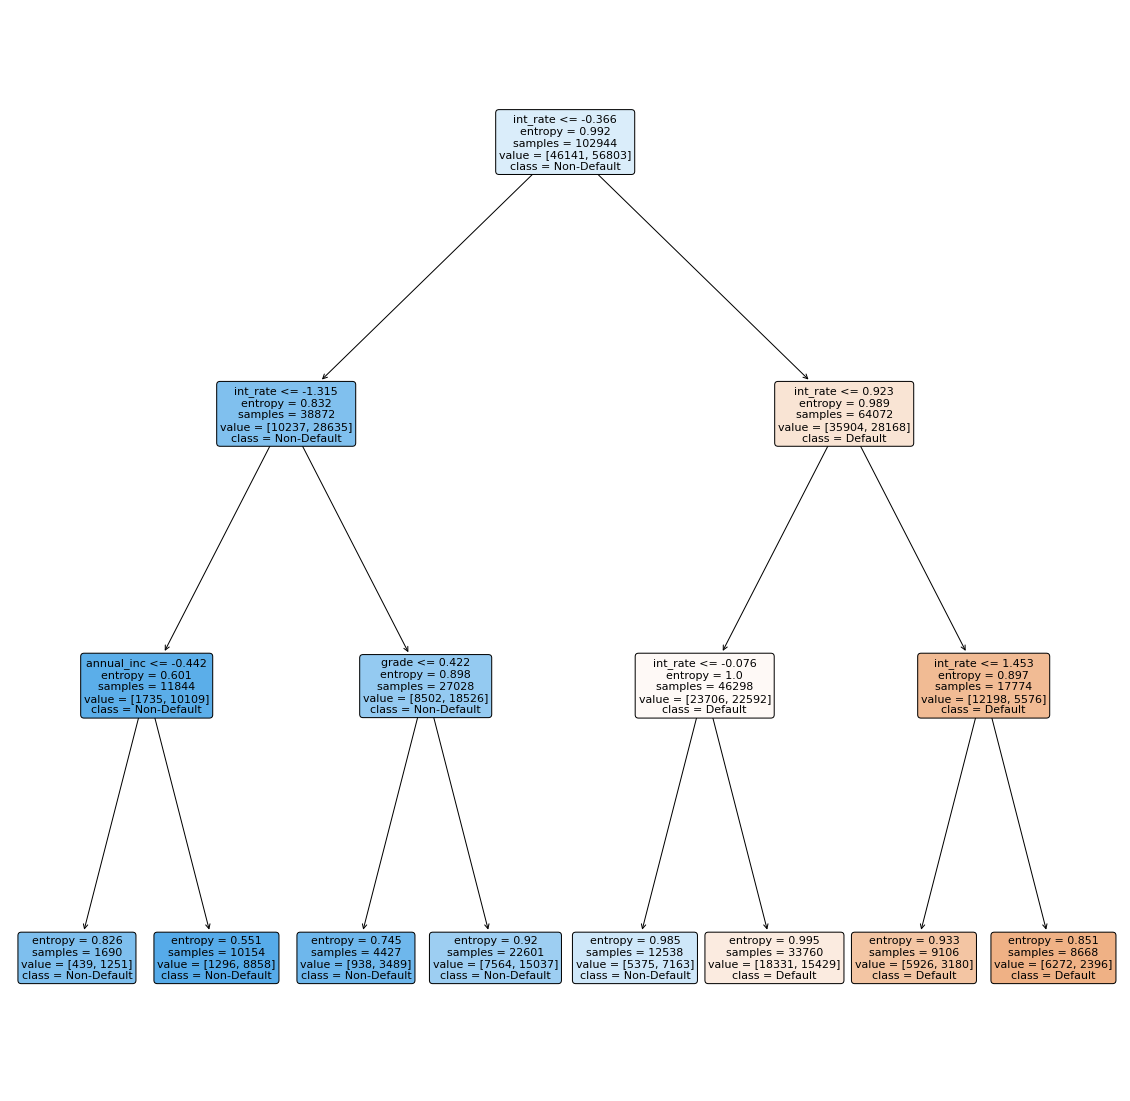

In [83]:
plt.figure(figsize=(20, 20))
plot_tree(Tree2, filled=True, rounded=True, class_names=["Default", "Non-Default"], feature_names=X.columns)

In [84]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=23)

# Train the model on the training data
rf_model.fit(xtrain, ytrain)
RF_predictions = rf_model.predict(xtest)


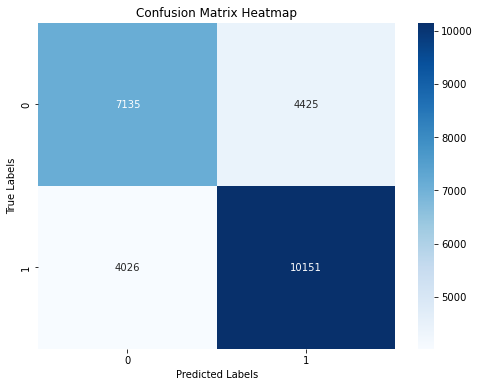

In [103]:

cm = confusion_matrix(ytest, RF_predictions)

# Calculate evaluation metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# Create the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()




In [107]:
from sklearn.tree import export_text, plot_tree

# Assuming random_forest_model is your trained Random Forest model
# Assuming X_train and y_train are your training features and labels, respectively
# Choose the index of the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0
individual_tree = rf_model.estimators_[tree_index]

# Generate the text representation of the decision tree
tree_text = export_text(individual_tree, feature_names=list(xtrain.columns))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(individual_tree, feature_names=list(xtrain.columns), class_names=["Low-Risk", "High-Risk"], filled=True)
plt.show()


KeyboardInterrupt: 

In [105]:
cm

array([[ 7135,  4425],
       [ 4026, 10151]], dtype=int64)

In [97]:
feature_importances = rf_model.feature_importances_


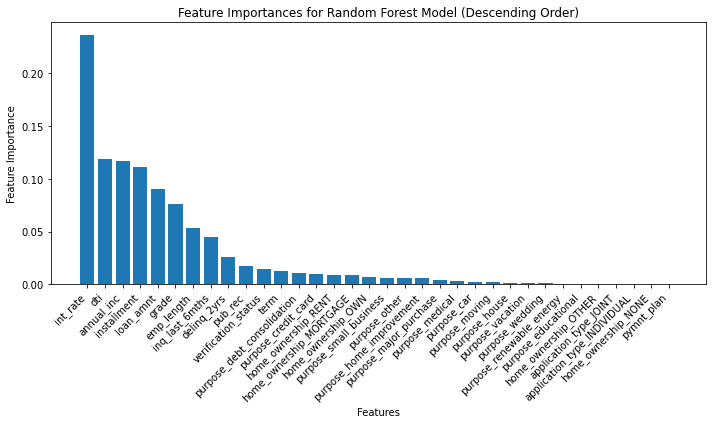

In [101]:


# Assuming features is a list of your feature names or column names
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Random Forest Model (Descending Order)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [85]:
RF_accuracy_score=accuracy_score(ytest,RF_predictions)
RF_precision=precision_score(ytest,RF_predictions)
RF_recall=recall_score(ytest,RF_predictions)
RF_f1_score=f1_score(ytest,RF_predictions)

# MODEL EVALUATION AND COMPARISON

In [86]:
#Calculate the performance metrics

data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression": [LR_accuracy_score, LR_precision, LR_recall, LR_f1_score],
    "Decision Tree": [Tree_accuracy_score, Tree_precision, Tree_recall, Tree_f1_score],
    "Random Forest": [RF_accuracy_score, RF_precision, RF_recall, RF_f1_score]
}
metric_table = pd.DataFrame(data)
metric_table

,Metric,Logistic Regression,Decision Tree,Random Forest
0,Accuracy,0.658585,0.607219,0.671640
1,Precision,0.670440,0.642437,0.696419
2,Recall,0.747760,0.647104,0.716019
3,F1-Score,0.706993,0.644762,0.706083


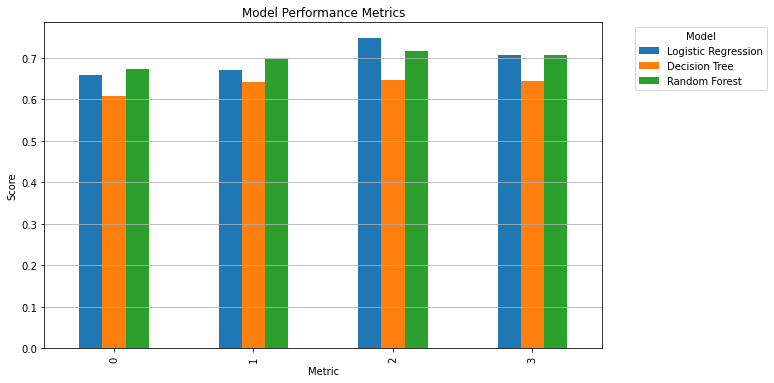

In [87]:
ax = metric_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.grid(axis='y')

# Move the legend outside the chart box
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

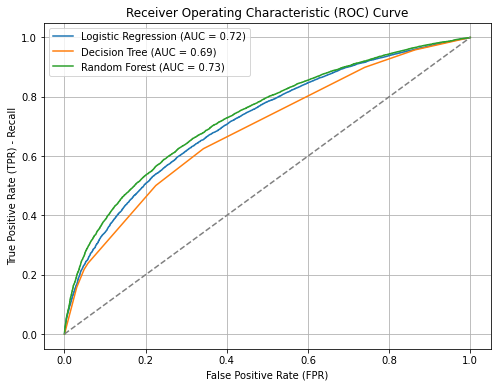

In [88]:

# Get predicted probabilities for each model
logreg_probs = model.predict_proba(xtest)[:, 1]
dt_probs = tree.predict_proba(xtest)[:, 1]
rf_probs = rf_model.predict_proba(xtest)[:, 1]

# Calculate ROC curves and AUC scores for each model
fpr_logreg, tpr_logreg, _ = roc_curve(ytest, logreg_probs)
fpr_dt, tpr_dt, _ = roc_curve(ytest, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(ytest, rf_probs)

auc_logreg = roc_auc_score(ytest, logreg_probs)
auc_dt = roc_auc_score(ytest, dt_probs)
auc_rf = roc_auc_score(ytest, rf_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Diagonal 45-degree line for reference (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) - Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [89]:

# Get predicted probabilities for each model
test_probs_logreg = model.predict_proba(xtest)[:, 1]
test_probs_dt = tree.predict_proba(xtest)[:, 1]
test_probs_rf = rf_model.predict_proba(xtest)[:, 1]

# Create a table to show the results
results_table = pd.DataFrame({
    'Probability of Default (Logistic Regression)': [f"{prob*100:.2f}%" for prob in test_probs_logreg],
    'Probability of Default (Decision Tree)': [f"{prob*100:.2f}%" for prob in test_probs_dt],
    'Probability of Default (Random Forest)': [f"{prob*100:.2f}%" for prob in test_probs_rf],
    'True Label': ['Default' if label == 1 else 'Non-Default' for label in ytest],
})

results_table


,Probability of Default (Logistic Regression),Probability of Default (Decision Tree),Probability of Default (Random Forest),True Label
0,78.07%,66.53%,77.39%,Non-Default
1,39.98%,45.70%,38.39%,Non-Default
2,59.74%,66.53%,53.79%,Default
3,69.62%,66.53%,77.84%,Non-Default
4,76.73%,66.53%,84.21%,Non-Default
...,...,...,...,...
25732,55.64%,66.53%,70.23%,Non-Default
25733,71.33%,57.13%,53.78%,Non-Default
25734,41.01%,34.92%,26.76%,Non-Default
25735,74.89%,87.24%,85.39%,Default


In [90]:
xtest.reset_index()

,index,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,pub_rec,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,125415,0.719381,-0.707618,-0.852585,0.965940,0.783835,1.135270,1.159611,0.648128,-0.006829,-0.617932,-0.365626,-0.733103,-0.332643,1.045427,-0.008816,-0.020299,-0.315316,-0.870817,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
1,40866,-0.346344,-0.707618,0.420307,-0.085504,0.060863,-0.001086,1.707512,-1.542906,-0.006829,-1.666977,-0.365626,1.062960,-0.332643,1.045427,-0.008816,-0.020299,-0.315316,-0.870817,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
2,78734,-1.056828,-0.707618,-0.742853,-1.008385,0.783835,-1.421531,-0.601501,-1.542906,-0.006829,-0.455507,-0.365626,0.164929,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,1.960939,-1.235185,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
3,56395,0.600967,1.413192,-0.742853,-0.040253,0.783835,0.851181,-0.119829,0.648128,-0.006829,-0.057382,-0.365626,0.164929,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,1.960939,-1.235185,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
4,45246,1.548279,-0.707618,-1.012794,1.850923,0.783835,-0.285175,0.109461,0.648128,-0.006829,0.059857,-0.365626,-0.733103,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,1.960939,-1.235185,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25732,63905,-0.346344,1.413192,-0.413657,-0.709789,0.783835,1.135270,-0.435927,-1.542906,-0.006829,2.002850,-0.365626,0.164929,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,1.960939,-1.235185,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
25733,118431,2.377177,1.413192,-0.084460,1.501105,0.060863,-0.569264,1.460656,-1.542906,-0.006829,-0.144091,-0.365626,0.164929,1.591168,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,1.960939,-1.235185,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
25734,68974,0.216122,1.413192,1.278412,0.003982,-1.385079,-1.421531,-0.466031,0.648128,-0.006829,1.515575,-0.365626,-0.733103,-0.332643,1.045427,-0.008816,-0.020299,-0.315316,-0.870817,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412
25735,96966,0.127311,-0.707618,-1.423192,0.227147,1.506806,-1.421531,0.203794,0.648128,-0.006829,0.495840,-0.365626,-0.733103,-0.332643,-0.956547,-0.008816,-0.020299,-0.315316,1.148347,-0.097794,-0.509960,0.809595,-0.028577,-0.240482,-0.069355,-0.140442,-0.102775,-0.085966,-0.239196,-0.027466,-0.138356,-0.073584,-0.060352,0.017412,-0.017412


In [91]:
ytest.reset_index()

,index,loan_status
0,863129,0
1,200208,0
2,427713,1
3,291071,0
4,218975,0
...,...,...
25732,339819,0
25733,806227,0
25734,370438,0
25735,603710,1
